In [1]:
!pip install -q kaggle

In [ ]:
!rm -rf /content/data/final_dataset

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          22682        630  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1157         28  1.0              
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           2696         61  1.0              
darshanprabhu09/stock-prices-f

In [6]:
!kaggle datasets download -d williiiamr/capstone

 99% 785M/792M [00:08<00:00, 85.5MB/s]
100% 792M/792M [00:08<00:00, 102MB/s] 


In [7]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as img
import zipfile

In [8]:
# extracting data from zip
local_zip = 'capstone.zip'
target_extraction = '/content/data/'
file_check = "ISIC_Labelled"

try:
    if os.path.exists(os.path.join(target_extraction, file_check)):
        print("File Already Extracted")
    else:
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(target_extraction)
        zip_ref.close()
#if data is already extracted it will instead print file already extracted
except FileNotFoundError:
    print('Zip File Not Found!')

In [9]:
!pip install augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
dir_names = ['actinic_keratosis', 'basal_cell_carcinoma', 'benign_keratosis', 'dermatofibroma', 'melanocytic_nevus', 'melanoma', 'squamous_cell_carcinoma', 'vascular_lesions']
import Augmentor
for i in dir_names:
    p = Augmentor.Pipeline(f"/content/data/dataset/{i}", output_directory=f'/content/data/final_dataset/{i}')
    p.rotate90(probability=0.7)
    p.flip_left_right(probability=0.8)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    p.flip_top_bottom(probability=0.8)
    p.crop_random(probability=1, percentage_area=0.5)
    p.resize(probability=1.0, width=150, height=150)
    p.sample(600) 

Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/actinic_keratosis.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F44B40A6FE0>: 100%|██████████| 600/600 [00:25<00:00, 23.77 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/basal_cell_carcinoma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F44B40C7CD0>: 100%|██████████| 600/600 [00:32<00:00, 18.47 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/benign_keratosis.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F44B5D93130>: 100%|██████████| 600/600 [00:18<00:00, 32.86 Samples/s]


Initialised with 141 image(s) found.
Output directory set to /content/data/final_dataset/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F44B5DCAAD0>: 100%|██████████| 600/600 [00:20<00:00, 29.95 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/melanocytic_nevus.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F44B62262C0>: 100%|██████████| 600/600 [00:23<00:00, 25.61 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/melanoma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F44B4071E70>: 100%|██████████| 600/600 [00:23<00:00, 25.97 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/squamous_cell_carcinoma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F44B408C1C0>: 100%|██████████| 600/600 [00:21<00:00, 28.23 Samples/s]


Initialised with 179 image(s) found.
Output directory set to /content/data/final_dataset/vascular_lesions.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F44B5F0B790>: 100%|██████████| 600/600 [00:18<00:00, 32.35 Samples/s]


In [ ]:
output_dir = pathlib.Path('/content/data/final_dataset')
image_count_train = len(list(output_dir.glob('*/*.jpg')))
print(image_count_train)


4800


In [11]:
training_main = pathlib.Path('/content/data/final_dataset/')

In [12]:
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_main,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(150, 150),
  batch_size=batch_size)

Found 4800 files belonging to 8 classes.
Using 3840 files for training.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_main,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(150,150),
  batch_size=batch_size)

Found 4800 files belonging to 8 classes.
Using 960 files for validation.


In [14]:
validation_size = int(0.5 * val_ds.cardinality().numpy())
test_ds = val_ds.take(validation_size)
val_ds = val_ds.skip(validation_size)

In [15]:
print("Training Set Size: %d" % train_ds.cardinality().numpy())
print("Validation Set Size: %d" % val_ds.cardinality().numpy())
print("Test Set Size: %d" % test_ds.cardinality().numpy())

Training Set Size: 120
Validation Set Size: 15
Test Set Size: 15


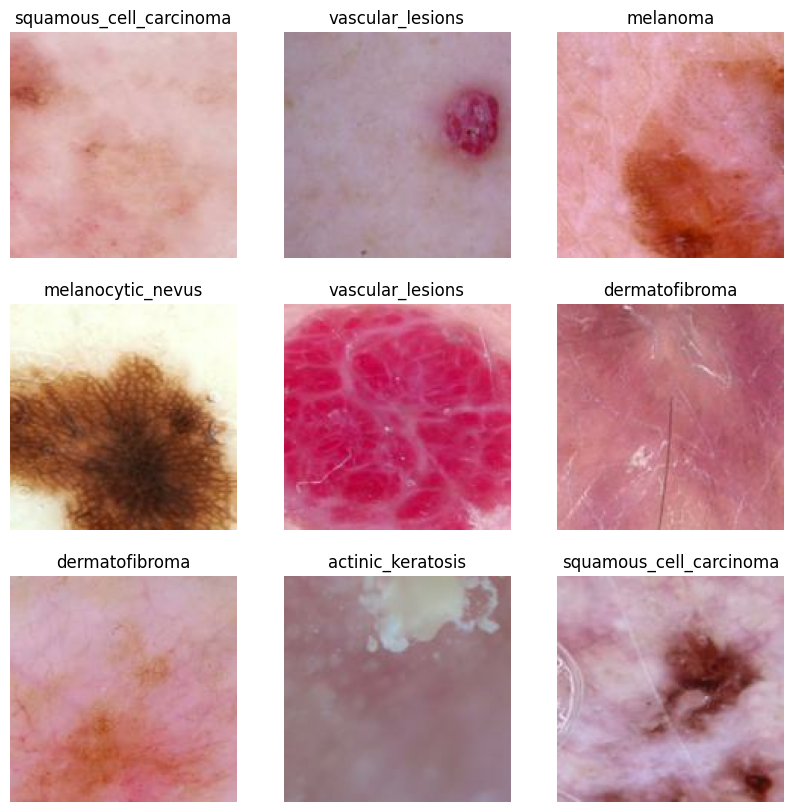

In [16]:
plt.figure(figsize=(10, 10))
for image, label in val_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(dir_names[label[i]])
        plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# IMG_SIZE = (150,150)
# IMG_SHAPE = IMG_SIZE + (3,)
# # resnet50 = tf.keras.applications.resnet152
# conv_model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
# conv_model.trainable = False
# conv_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_19[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [ ]:
# preprocess_input = tf.keras.applications.xception.preprocess_input
# inputs = tf.keras.Input(shape=IMG_SHAPE)
# x = preprocess_input(inputs)
# x = conv_model(x)
# x = tf.keras.layers.GlobalAveragePooling2D()(conv_model.output)  
# output=tf.keras.layers.Dense(8, activation='softmax')(x)
# model=tf.keras.models.Model(inputs=conv_model.input, outputs=output)
# model.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_19[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax

IMG_SIZE = (150,150)
IMG_SHAPE = IMG_SIZE + (3,)
base_model=tf.keras.applications.EfficientNetB1(include_top=False, weights="imagenet",input_shape=IMG_SHAPE, pooling='max') 

preprocess_input = tf.keras.applications.efficientnet.preprocess_input
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = preprocess_input(inputs)
x = base_model(x)
x = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x) 
x = tf.keras.layers.Dense(32, activation = 'relu', activity_regularizer=regularizers.l1_l2(l1=0.025, l2=0.025))(x)
x = tf.keras.layers.Dropout(0.4)(x)
output=Dense(8, activation='softmax')(x)
model=Model(inputs=inputs, outputs=output)
# model.compile(Adamax(learning_rate=.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
base_learning_rate = 0.001

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                  metrics=['accuracy'])

In [ ]:
initial_epochs = 15
history =model.fit(train_ds, validation_data=val_ds, validation_steps=int(0.2*len(val_ds)), epochs=initial_epochs)

Epoch 1/15
120/120 [==============================] - 84s 209ms/step - loss: 2.4283 - accuracy: 0.2831 - val_loss: 2.0647 - val_accuracy: 0.3333
Epoch 2/15
120/120 [==============================] - 23s 188ms/step - loss: 1.8431 - accuracy: 0.4302 - val_loss: 1.8033 - val_accuracy: 0.4375
Epoch 3/15
120/120 [==============================] - 23s 188ms/step - loss: 1.7293 - accuracy: 0.4901 - val_loss: 5.7393 - val_accuracy: 0.4271
Epoch 4/15
120/120 [==============================] - 22s 187ms/step - loss: 1.5701 - accuracy: 0.5677 - val_loss: 1.5526 - val_accuracy: 0.5938
Epoch 5/15
120/120 [==============================] - 22s 185ms/step - loss: 1.5661 - accuracy: 0.5693 - val_loss: 4.6034 - val_accuracy: 0.3750
Epoch 6/15
120/120 [==============================] - 22s 186ms/step - loss: 1.6649 - accuracy: 0.5057 - val_loss: 1.6388 - val_accuracy: 0.5312
Epoch 7/15
120/120 [==============================] - 22s 186ms/step - loss: 1.5690 - accuracy: 0.5359 - val_loss: 2.0403 - val_ac

In [ ]:
full_model.save('./model_weights/skin_model(this_model_kinda_good).h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

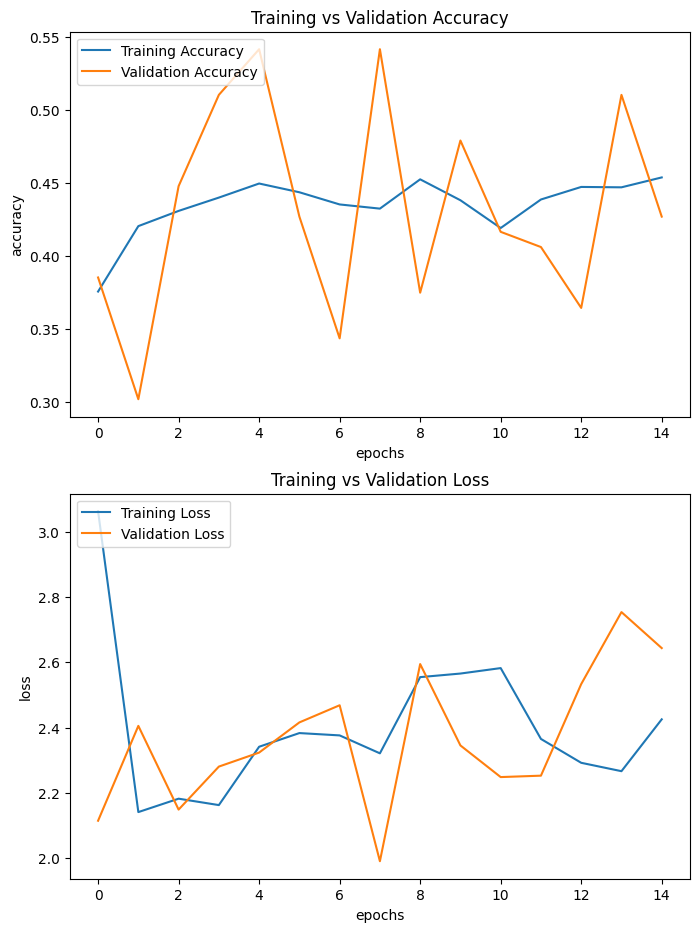

In [ ]:

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Loss')

In [29]:
print(train_ds.class_names)
label = train_ds.class_names

['actinic_keratosis', 'basal_cell_carcinoma', 'benign_keratosis', 'dermatofibroma', 'melanocytic_nevus', 'melanoma', 'squamous_cell_carcinoma', 'vascular_lesions']


In [19]:
from tensorflow.keras.models import load_model
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

In [24]:
model = load_model('/content/skin_model(val acc _ 89).h5')

In [25]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_10 (Rescaling)       (None, 150, 150, 3)  0           ['input_13[0][0]']               
                                                                                                  
 normalization_10 (Normalizatio  (None, 150, 150, 3)  7          ['rescaling_10[0][0]']           
 n)                                                                                               
                                                                                           

In [64]:
uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  result = classes[0]
  predicted_label = np.argmax(result)
  print(f'{label[predicted_label]} have {round(result[predicted_label] * 100)}% accuracy')
  
  name = list(uploaded.keys())
  
  !rm '{name[0]}'

Saving ISIC_0070625.jpg to ISIC_0070625.jpg
1/1 [==============================] - 0s 74ms/step
[0.7636279  0.02848319 0.03712301 0.03359742 0.02656005 0.02566966
 0.05086546 0.03407336]
actinic_keratosis have 76% accuracy
